# Project: Investigating TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will conduct data analysis in the movie database. Our goal is to investigate the performance of movies genres associated with popularity from year to year, properties that are associated with movies that have high revenues. We will start by taking a look at our dataset and brainstorming what questions we could answer using it. Then we will use pandas and NumPy to answer the questions and create a report sharing the answers.

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  
    > - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
    > - There are some odd characters in the ‘cast’ column.
    > - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time 


### Question(s) for Analysis

> - Which genres are most popular from year to year?
> - What kinds of properties are associated with movies that have high revenues? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> 1. Load the data
> 2. Check the shape(10866 rows and 21 columns)
> 3. Check for duplicate values 
> 4. Check for null values


In [3]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df_movies.shape

(10866, 21)

In [7]:
#checking if there exist any duplicate value
print(df_movies.duplicated().sum())

1


In [8]:
#checking for null values
df_movies.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool


## Data Cleaning
> 1. Remove the unneeded columns: 12
> 2. Drop the duplicate value: 1
> 3. Drop any row with Null values : director,genres
> 4. Removed zero values in the budget and revenue columns
> 5. Multiple values separated by pipe (|) characters: genres

In [9]:
#removing columns that will not be used this analysis
df_movies.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','runtime',
         'production_companies','release_date','budget_adj','revenue_adj'], axis=1, inplace=True)

In [11]:
#removing the duplicate value
df_movies.drop_duplicates(inplace=True)

In [12]:
#removing null values
df_movies.dropna(inplace=True)

In [13]:
#remove rows with zero values
df_movies = df_movies[(df_movies != 0).all(1)]

In [14]:
df_movies.shape

(3853, 9)

In [15]:
df_movies.head()

,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3853 non-null   float64
 1   budget          3853 non-null   int64  
 2   revenue         3853 non-null   int64  
 3   original_title  3853 non-null   object 
 4   director        3853 non-null   object 
 5   genres          3853 non-null   object 
 6   vote_count      3853 non-null   int64  
 7   vote_average    3853 non-null   float64
 8   release_year    3853 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 301.0+ KB


In [17]:
#split the genres rows in mulple rows
g = df_movies['genres'].str.split('|').apply(pd.Series, 1).stack()

In [18]:
g.index = g.index.droplevel(-1)

In [19]:
g.name = 'genres'

In [20]:
del df_movies['genres']

In [21]:
df_movies= df_movies.join(g)
df_movies

,popularity,budget,revenue,original_title,director,vote_count,vote_average,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,6185,7.1,2015,Action
...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,Drama
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,War
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,Romance
10848,0.207257,5115000,12000000,Fantastic Voyage,Richard Fleischer,42,6.7,1966,Adventure


<a id='eda'></a>
## Exploratory Data Analysis

> I have used the analysis step to answer these questions


### Research Question 1 (Which genres are most popular from year to year?!)

In [22]:
#check unique values
df_movies['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

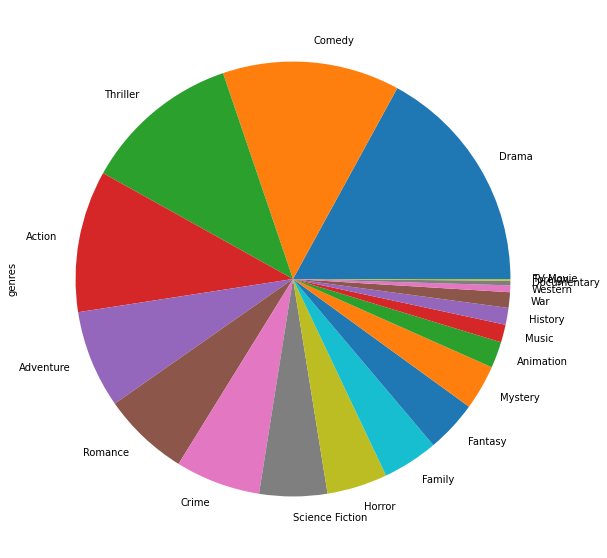

In [23]:
df_movies['genres'].value_counts().plot(kind='pie',figsize= (10,10));

In [24]:
# verify the popularity of genres from year to year
df_movies.groupby(['genres','release_year']).mean().popularity

genres   release_year
Action   1960            1.504538
         1961            0.464139
         1962            1.848380
         1963            1.357698
         1964            3.153791
                           ...   
Western  2011            1.569682
         2012            5.944518
         2013            0.801051
         2014            0.870104
         2015            7.504550
Name: popularity, Length: 842, dtype: float64

In [25]:
# Bin edges that will be used to "cut" the data into groups
bin_edges= [1960,1965,1970,1975,1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

# Labels for the six decades groups        
bin_years= [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

# Creates release_year_grouped column
df_movies['release_year_grouped']= pd.cut(df_movies['release_year'],bin_edges,labels=bin_years)

In [26]:
df_movies

,popularity,budget,revenue,original_title,director,vote_count,vote_average,release_year,genres,release_year_grouped
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Action,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Adventure,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Science Fiction,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,6185,7.1,2015,Action,2015
...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,Drama,1970
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,War,1970
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,28,7.0,1966,Romance,1970
10848,0.207257,5115000,12000000,Fantastic Voyage,Richard Fleischer,42,6.7,1966,Adventure,1970


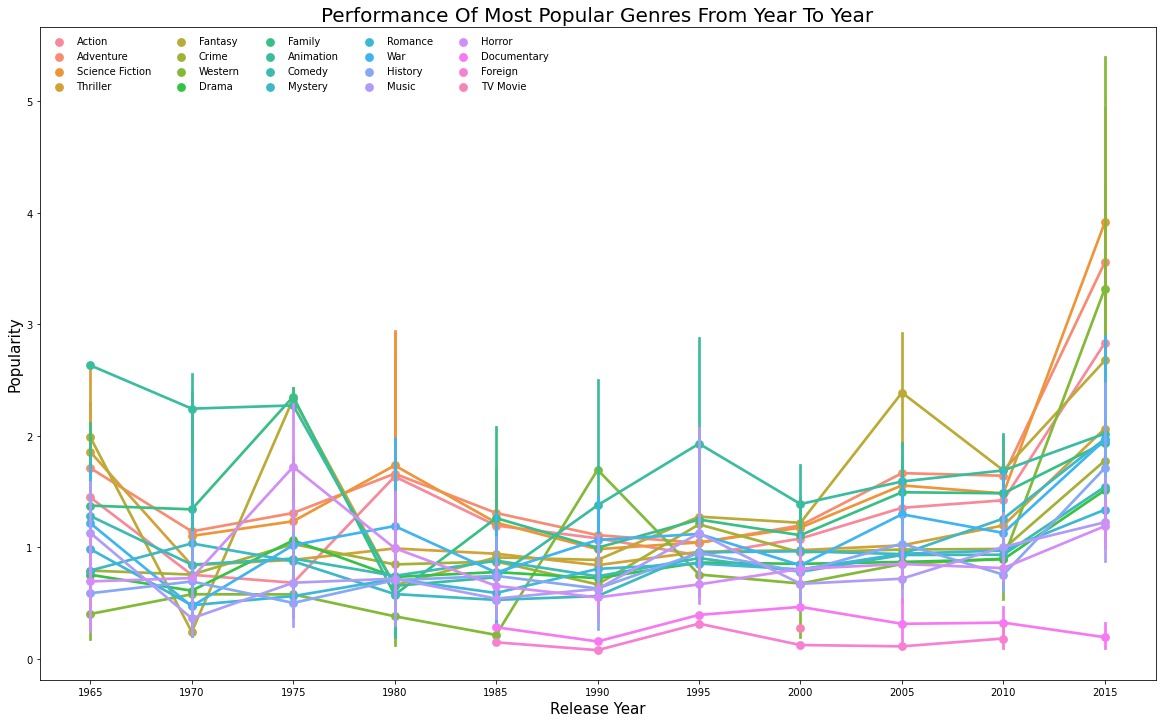

In [27]:
plt.subplots(figsize=(20,12))
plt.title('Performance Of Most Popular Genres From Year To Year', fontsize = 20)
ax = sns.pointplot(x='release_year_grouped', y='popularity', hue='genres', 
                   data=df_movies);
plt.legend(frameon=False, loc='upper left', ncol=5, fontsize=10)
ax.set_xlabel("Release Year", fontsize=15)
ax.set_ylabel("Popularity", fontsize=15)

plt.show()

This chart show that Action, Adventure, Syfy, Crime and Thriller seem to be steady over the years. However, in 2015 the most popular genre was Syfy next to Action. While in 1965, the most popular was Animation.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?!)

In [29]:
#Sorting the data by the revenue column descendingly

df_movies.sort_values(by='revenue',ascending = False,inplace=True)

In [30]:
#print out the first  rows of our data

df_movies.head()

,popularity,budget,revenue,original_title,director,vote_count,vote_average,release_year,genres,release_year_grouped
1386,9.432768,237000000,2781505847,Avatar,James Cameron,8458,7.1,2009,Adventure,2010
1386,9.432768,237000000,2781505847,Avatar,James Cameron,8458,7.1,2009,Action,2010
1386,9.432768,237000000,2781505847,Avatar,James Cameron,8458,7.1,2009,Science Fiction,2010
1386,9.432768,237000000,2781505847,Avatar,James Cameron,8458,7.1,2009,Fantasy,2010
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,5292,7.5,2015,Action,2015


In [31]:
#Show an overview about the data

df_movies.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10299.000000,1.029900e+04,1.029900e+04,10299.000000,10299.000000,10299.000000
mean,1.262572,4.165424e+07,1.197150e+08,574.310516,6.156238,2000.919118
std,1.607808,4.532646e+07,1.923323e+08,940.545841,0.789817,11.278677
min,0.001117,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000
25%,0.477489,1.100000e+07,1.486751e+07,76.000000,5.700000,1995.000000
50%,0.843170,2.510000e+07,5.054911e+07,225.000000,6.200000,2004.000000
75%,1.462309,5.700000e+07,1.410585e+08,634.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000


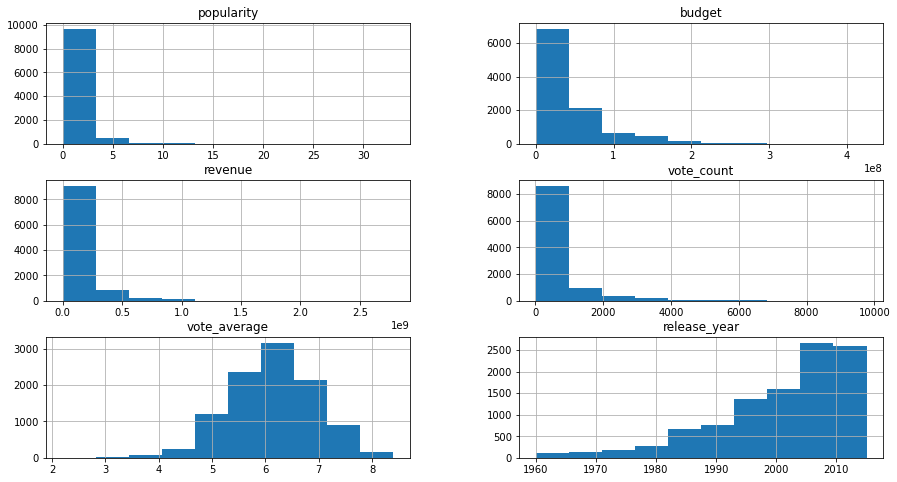

In [32]:
#Plotting a histogram for the columns in the data

df_movies.hist(figsize = (15,8));

### Research Question 3 (Who are the top 5 directors according to high revenues?!)

In [40]:
#Top five directors by revenues

grouped_directors = df_movies.groupby('director')['revenue'].sum()
grouped_directors = grouped_directors.sort_values(ascending = False)[:5]
grouped_directors

director
Steven Spielberg     24663086098
James Cameron        20132327500
Peter Jackson        17530037629
Michael Bay          16297866403
Christopher Nolan    16196885522
Name: revenue, dtype: int64

C:\Users\OLANRE~1\AppData\Local\Temp/ipykernel_18676/3120737193.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped_directors.index,rotation=90)


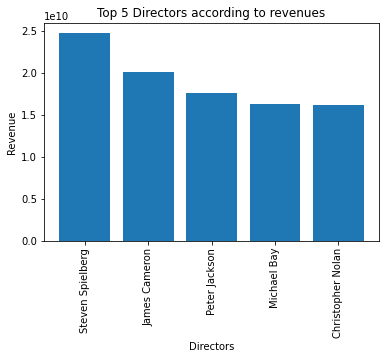

In [41]:
#Plotting data

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(grouped_directors.index,rotation=90)
ax.set_title("Top 5 Directors according to revenues")
ax.set_xlabel('Directors')
ax.set_ylabel('Revenue')

ax.bar(grouped_directors.index, grouped_directors);

<a id='conclusions'></a>
## Conclusions

>In this analysis I found null values in the director, cast, keywords and genres columns. Moreover, budget and revenue had many zero values. These dataset limitations affected my analysis because prior to cleaning, the dataset had 10,866 rows and after cleaning it reduced to 3,853 rows. This means that I analyzed only 36% of the sample data.

### Results : 

> 1. The most popular movie genre watched from year to year are Drama and Comedy.
> 2. The number of movies increases from year to year
> 3. The most director according to revenue is Steven Spielberg

### Limitations :

> 1. This datatset has a lot of unneeded colums which needed to be removed for this analysis
> 2. This datatset has a lot of missing values which need to decide what to do with it
> 3. The cast column and some other columns has strings and seperated with '|' character which limited our analysis
> 4. This dataset has a great number of unique values in each columns

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigating_The_Movie_Database (TMDb).ipynb'])

1